<hr style="border:2px solid gray"> </hr>

# Preprocessing

## Author : Huisung Son

<hr style="border:2px solid gray"> </hr>

# Step 0. Import Packages and Variables

In [1]:
# package list
import os, glob, numpy as np
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from numpy import expand_dims
import h5py

img_path = './image'
category_file_name = 'Categories.txt'
train_name = 'train.hdf5'
test_name = 'test.hdf5'
data_name = 'data.hdf5'

image_h = 300
image_w = 300
pixels = image_h * image_w * 3

categories = []

# Step 1. Load Category File

In [2]:
def NormalizeLabel(Label):
    arr = [0 for i in range(classes)]
    arr[Label] = 1
    return arr

In [3]:
import codecs
category_file = codecs.open(category_file_name, 'r', 'utf-8')
categories = list(map(str.strip, category_file.readlines()))
classes = len(categories)

# Step 2. Load Image, Preprocess, and Save

In [4]:
def gen_image(img):
    _x = np.random.randint(img.size[0] - image_h) if img.size[0] > image_h else 0
    _y = np.random.randint(img.size[1] - image_w) if img.size[1] > image_w else 0
    img = img.crop((_x,_y, 500 if img.size[0] > 500 + _x else img.size[0], 500 if img.size[1] > 500 + _x else img.size[1]))
    img = img.resize((image_w, image_h))
    return img

In [5]:
#len_of_image = 0

In [6]:
X = []
y = []
count = 2

from tqdm import tqdm

for idx, cat in tqdm(enumerate(categories)):
    label = NormalizeLabel(idx)

    img_name = img_path+'/'+cat+'/'
    files = glob.glob(img_name+'*.jpg')
    # print(cat + ' '*(10 - 2*len(cat)) + " 파일 길이 : ", len(files))

    for i, f in enumerate(files):
        img = Image.open(f)
        img = img.convert("RGB")
        for k in range(count):
            _img = gen_image(img)
            data = np.asarray(_img)
            X.append(data)
            y.append(label)
            
X = np.array(X)
y = np.array(y)
# X_train, X_test, y_train, y_test = train_test_split(X, y)

# with h5py.File(train_name, 'w') as f:
#      f.create_dataset('X', X_train.shape, data=X_train)
#      f.create_dataset('y', y_train.shape, data=y_train)

# with h5py.File(test_name, 'w') as f:
#     f.create_dataset('X', X_test.shape, data=X_test)
#     f.create_dataset('y', y_test.shape, data=y_test)

# print("Save Done : Total", len(y), 'Files')

296it [11:09,  2.26s/it]


In [7]:
with h5py.File('data.hdf5', 'w') as f:
    f.create_dataset('X', X.shape, data=X)
    f.create_dataset('y', y.shape, data=y)

print("Save Done : Total", len(y), 'Files')

Save Done : Total 85212 Files


# Step 3

In [8]:
print(X.shape, X.dtype)

(85212, 300, 300, 3) uint8


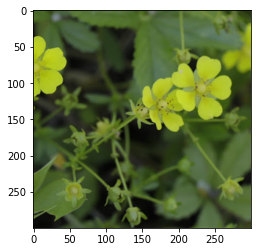

In [14]:
import matplotlib.pyplot as plt

plt.imshow(X[8])
plt.show()

In [11]:
(y[1], categories[y[0].argmax()])

(array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0])